In [24]:
# Cell 1: Imports and Loading (Step 4)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

# Load datasets
df_produce = pd.read_csv('../data/produce.csv')
df_yield_prod = pd.read_csv('../data/datafile (2).csv')
df_cost = pd.read_csv('../data/datafile (1).csv')
df_index = pd.read_csv('../data/datafile.csv')
df_varieties = pd.read_csv('../data/datafile (3).csv')

# Quick check
df_produce.head()

,Particulars,Frequency,Unit,3-1993,3-1994,3-1995,3-1996,3-1997,3-1998,3-1999,...,3-2005,3-2006,3-2007,3-2008,3-2009,3-2010,3-2011,3-2012,3-2013,3-2014
0,Agricultural Production Foodgrains,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,198.36282,208.6016,217.28212,230.77504,234.466177,218.107372,244.491809,259.286253,257.13,264.3806
1,Agricultural Production Foodgrains Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,103.30942,109.8734,110.57622,120.95724,118.138577,103.954032,120.853191,131.274812,128.07,129.3686
2,Agricultural Production Foodgrains Rabi,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.05340,98.7282,106.70590,109.81780,116.327600,114.153340,123.638618,128.011441,129.06,135.0120
3,Agricultural Production Foodgrains Rice,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,83.13170,91.7934,93.35530,96.69290,99.182500,89.092901,95.979819,105.301100,105.24,106.2872
4,Agricultural Production Foodgrains Rice Kharif,"Annual, Ending mar Of Each Year",Ton mn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,72.23000,78.2719,80.17080,82.65940,84.908200,75.916510,80.651241,92.780700,92.37,92.0093


In [25]:
# Cell 2: Inspection (Step 5)
print("=== produce.csv ===")
print("Info:")
print(df_produce.info())
print("\nDescribe:")
print(df_produce.describe())
print("\nHead:")
print(df_produce.head())
# ... (other datasets)

=== produce.csv ===
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Particulars  429 non-null    object 
 1   Frequency    429 non-null    object 
 2   Unit         429 non-null    object 
 3    3-1993      3 non-null      float64
 4    3-1994      4 non-null      float64
 5    3-1995      4 non-null      float64
 6    3-1996      6 non-null      float64
 7    3-1997      10 non-null     float64
 8    3-1998      10 non-null     float64
 9    3-1999      11 non-null     float64
 10   3-2000      20 non-null     float64
 11   3-2001      22 non-null     float64
 12   3-2002      36 non-null     float64
 13   3-2003      128 non-null    float64
 14   3-2004      361 non-null    float64
 15   3-2005      425 non-null    float64
 16   3-2006      423 non-null    float64
 17   3-2007      418 non-null    float64
 18   3-2008      417 non-nul

In [26]:
# Cell 3: Cleaning produce.csv (Step 6, where error occurred)
df_produce = df_produce.replace('NA', pd.NA)
df_produce_t = df_produce.set_index('Particulars').T.iloc[2:].apply(pd.to_numeric, errors='coerce')
df_produce_t.columns = df_produce_t.columns.str.strip()
df_produce_t.head()

Particulars,Agricultural Production Foodgrains,Agricultural Production Foodgrains Kharif,Agricultural Production Foodgrains Rabi,Agricultural Production Foodgrains Rice,Agricultural Production Foodgrains Rice Kharif,Agricultural Production Foodgrains Rice Rabi,Agricultural Production Foodgrains Wheat Rabi,Agricultural Production Foodgrains Jowar,Agricultural Production Foodgrains Jowar Kharif,Agricultural Production Foodgrains Jowar Rabi,...,Agricultural Production Foodgrains Coarse Cereals Yield Karnataka,Agricultural Production Foodgrains Coarse Cereals Yield Madhya Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Maharashtra,Agricultural Production Foodgrains Coarse Cereals Yield Orissa,Agricultural Production Foodgrains Coarse Cereals Yield Punjab,Agricultural Production Foodgrains Coarse Cereals Yield Rajasthan,Agricultural Production Foodgrains Coarse Cereals Yield Tamil Nadu,Agricultural Production Foodgrains Coarse Cereals Yield Uttar Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Uttaranchal,Agricultural Production Foodgrains Coarse Cereals Yield West Bengal
3-1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3-1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cleaning produce.csv
- Replaced 'NA' with pd.NA.
- Transposed to make years as rows, crops as columns.
- Converted to numeric, stripped column names.

In [27]:
df_produce_t.tail()

Particulars,Agricultural Production Foodgrains,Agricultural Production Foodgrains Kharif,Agricultural Production Foodgrains Rabi,Agricultural Production Foodgrains Rice,Agricultural Production Foodgrains Rice Kharif,Agricultural Production Foodgrains Rice Rabi,Agricultural Production Foodgrains Wheat Rabi,Agricultural Production Foodgrains Jowar,Agricultural Production Foodgrains Jowar Kharif,Agricultural Production Foodgrains Jowar Rabi,...,Agricultural Production Foodgrains Coarse Cereals Yield Karnataka,Agricultural Production Foodgrains Coarse Cereals Yield Madhya Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Maharashtra,Agricultural Production Foodgrains Coarse Cereals Yield Orissa,Agricultural Production Foodgrains Coarse Cereals Yield Punjab,Agricultural Production Foodgrains Coarse Cereals Yield Rajasthan,Agricultural Production Foodgrains Coarse Cereals Yield Tamil Nadu,Agricultural Production Foodgrains Coarse Cereals Yield Uttar Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Uttaranchal,Agricultural Production Foodgrains Coarse Cereals Yield West Bengal
3-2010,218.107372,103.954032,114.153340,89.092901,75.916510,13.176391,80.803558,6.698203,2.763233,3.934970,...,1591.0,1136.0,1017.0,1357.0,3315.0,541.0,2516.0,1541.0,1160.0,3531.0
3-2011,244.491809,120.853191,123.638618,95.979819,80.651241,15.328578,86.873953,7.003147,3.439147,3.564000,...,2151.0,1233.0,1186.0,1714.0,3600.0,1051.0,2476.0,1563.0,1328.0,3700.0
3-2012,259.286253,131.274812,128.011441,105.301100,92.780700,12.520400,94.882063,5.979153,3.293000,2.686153,...,1957.0,1395.0,1177.0,1368.0,3929.0,1080.0,3625.0,1759.0,1320.0,3455.0
3-2013,257.130000,128.070000,129.060000,105.240000,92.370000,12.870000,93.510000,5.280000,2.840000,2.440000,...,1713.0,1543.0,930.0,1611.0,3533.0,1156.0,2357.0,1845.0,1360.0,5250.0
3-2014,264.380600,129.368600,135.012000,106.287200,92.009300,14.277900,95.849200,5.246700,2.229200,3.017500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Cleaning datafile (2).csv
df_yield_prod.columns = df_yield_prod.columns.str.strip()  # Remove leading/trailing spaces
df_yield_prod = pd.melt(df_yield_prod, id_vars=['Crop'], var_name='Metric_Year', value_name='Value')
df_yield_prod['Metric'] = df_yield_prod['Metric_Year'].str.split(' ').str[0]
df_yield_prod['Year'] = df_yield_prod['Metric_Year'].str.split(' ').str[1]
df_yield_prod = df_yield_prod.pivot_table(index=['Crop', 'Year'], columns='Metric', values='Value').reset_index()
df_yield_prod.head()

Metric,Crop,Year,Area,Production,Yield
0,Arecanut,2006-07,167.7,182.5,108.8
1,Arecanut,2007-08,169.5,184.3,108.7
2,Arecanut,2008-09,169.7,185.5,109.3
3,Arecanut,2009-10,175.4,184.3,105.1
4,Arecanut,2010-11,175.4,184.3,105.1


# Cleaning datafile (2).csv
- Stripped whitespace from column names.
- Melted to long format (Crop, Year, Metric).
- Split Metric_Year into Metric and Year.
- Pivoted to separate Production, Area, Yield columns.

In [29]:
print(df_cost.columns)

Index(['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL',
       'Cost of Cultivation (`/Hectare) C2',
       'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare) '],
      dtype='object')


In [30]:
df_cost.columns = df_cost.columns.str.strip()
df_cost = df_cost.apply(lambda x: pd.to_numeric(x, errors='coerce') if x.name in ['Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)'] else x)
df_cost.head()

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72


# Cleaning datafile (1).csv
- Stripped whitespace from column names.
- Converted cost/yield columns to numeric.

In [31]:
df_index = pd.melt(df_index, id_vars=['Crop'], var_name='Year', value_name='Index')
df_index['Index'] = pd.to_numeric(df_index['Index'], errors='coerce')
df_index.head()

,Crop,Year,Index
0,Rice,2004-05,100.0
1,Wheat,2004-05,100.0
2,Coarse Cereals,2004-05,100.0
3,Pulses,2004-05,100.0
4,Vegetables,2004-05,100.0


# Cleaning datafile.csv
- Melted to long format (Crop, Year, Index).
- Converted Index to numeric.

In [32]:
print("Columns:", df_index.columns.tolist())

Columns: ['Crop', 'Year', 'Index']


In [33]:
# 5. df_varieties (datafile (3).csv)
df_varieties = pd.read_csv('../data/datafile (3).csv')
df_varieties.columns = df_varieties.columns.str.strip().str.replace('_', ' ')  # Remove spaces, standardize
df_varieties = df_varieties.replace(['NA', 'N/A', ''], pd.NA)
# Drop 'Unnamed: 4' if present
if 'Unnamed: 4' in df_varieties.columns:
    df_varieties = df_varieties.drop('Unnamed: 4', axis=1)
# Rename columns to match expected structure
df_varieties.columns = ['Crop', 'Variety', 'Season_duration', 'Recommended_Zone']
print("df_varieties columns after fix:", df_varieties.columns.tolist())
print("df_varieties missing:", df_varieties.isna().sum())

df_varieties columns after fix: ['Crop', 'Variety', 'Season_duration', 'Recommended_Zone']
df_varieties missing: Crop                 0
Variety              0
Season_duration     28
Recommended_Zone     1
dtype: int64


In [34]:
df_varieties.head()

,Crop,Variety,Season_duration,Recommended_Zone
0,Paddy,Chinsurah Rice (IET 19140),Medium,"Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a..."
1,Paddy,(CNI 383-5-11),NaN,NaN
2,Paddy,IGKVR-1 (IET 19569),Mid-early,"Chhattisgarh, Madhya Pradesh and Orissa under ..."
3,Paddy,IGKVR-2 (IET 19795),Medium,"Chhattisgarh, Bihar and Orissa under both irr..."
4,Paddy,CR Dhan 401 (REETA),145-150,"Orissa, West Bengal, Tamil Nadu and Andhra Pra..."


# Cleaning datafile (3).csv
- Standardized column names.
- Dropped rows with missing Variety.


In [35]:
df_merged = df_cost.merge(df_varieties, on='Crop', how='left')
df_merged.head()


,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare),Variety,Season_duration,Recommended_Zone
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83,NaN,NaN,NaN
1,ARHAR,Karnataka,10593.15,16528.68,2172.46,7.47,NaN,NaN,NaN
2,ARHAR,Gujarat,13468.82,19551.90,1898.30,9.59,NaN,NaN,NaN
3,ARHAR,Andhra Pradesh,17051.66,24171.65,3670.54,6.42,NaN,NaN,NaN
4,ARHAR,Maharashtra,17130.55,25270.26,2775.80,8.72,NaN,NaN,NaN


# Merging Datasets
- Merged costs and varieties on Crop (left join).


In [36]:
# Handling Missing Values
df_merged = df_merged.dropna(subset=['Yield (Quintal/ Hectare)'])
df_produce_t = df_produce_t.dropna(thresh=5)  # At least 5 non-NA
print(df_merged.isna().sum())

Crop                                      0
State                                     0
Cost of Cultivation (`/Hectare) A2+FL     0
Cost of Cultivation (`/Hectare) C2        0
Cost of Production (`/Quintal) C2         0
Yield (Quintal/ Hectare)                  0
Variety                                  49
Season_duration                          49
Recommended_Zone                         49
dtype: int64


In [37]:
print(df_merged.columns.tolist())

['Crop', 'State', 'Cost of Cultivation (`/Hectare) A2+FL', 'Cost of Cultivation (`/Hectare) C2', 'Cost of Production (`/Quintal) C2', 'Yield (Quintal/ Hectare)', 'Variety', 'Season_duration', 'Recommended_Zone']


# Handling Missing Values
- Dropped rows missing Yield in df_merged.
- Dropped rows in df_produce_t with <5 non-NA values.


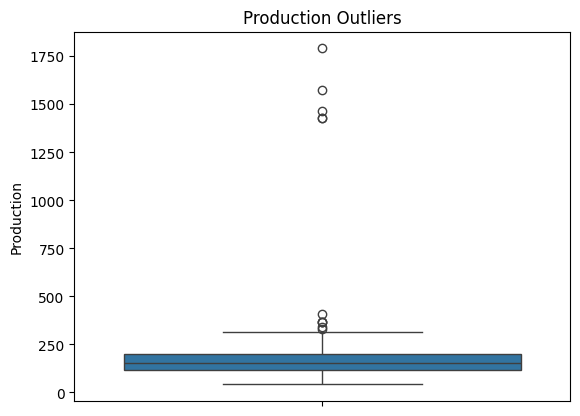

In [38]:
sns.boxplot(data=df_yield_prod, y='Production')
plt.title('Production Outliers')
plt.show()
df_yield_prod['Production'] = df_yield_prod['Production'].clip(upper=df_yield_prod['Production'].quantile(0.99))


# Outlier Detection
- Visualized Production outliers.
- Clipped to 99th percentile.


In [39]:
df_yield_prod['Yield_calc'] = df_yield_prod['Production'] / df_yield_prod['Area']
df_produce_t['Growth_Rate'] = df_produce_t['Agricultural Production Foodgrains'].pct_change() * 100


In [40]:
df_produce_t.tail()

Particulars,Agricultural Production Foodgrains,Agricultural Production Foodgrains Kharif,Agricultural Production Foodgrains Rabi,Agricultural Production Foodgrains Rice,Agricultural Production Foodgrains Rice Kharif,Agricultural Production Foodgrains Rice Rabi,Agricultural Production Foodgrains Wheat Rabi,Agricultural Production Foodgrains Jowar,Agricultural Production Foodgrains Jowar Kharif,Agricultural Production Foodgrains Jowar Rabi,...,Agricultural Production Foodgrains Coarse Cereals Yield Madhya Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Maharashtra,Agricultural Production Foodgrains Coarse Cereals Yield Orissa,Agricultural Production Foodgrains Coarse Cereals Yield Punjab,Agricultural Production Foodgrains Coarse Cereals Yield Rajasthan,Agricultural Production Foodgrains Coarse Cereals Yield Tamil Nadu,Agricultural Production Foodgrains Coarse Cereals Yield Uttar Pradesh,Agricultural Production Foodgrains Coarse Cereals Yield Uttaranchal,Agricultural Production Foodgrains Coarse Cereals Yield West Bengal,Growth_Rate
3-2010,218.107372,103.954032,114.153340,89.092901,75.916510,13.176391,80.803558,6.698203,2.763233,3.934970,...,1136.0,1017.0,1357.0,3315.0,541.0,2516.0,1541.0,1160.0,3531.0,-6.977043
3-2011,244.491809,120.853191,123.638618,95.979819,80.651241,15.328578,86.873953,7.003147,3.439147,3.564000,...,1233.0,1186.0,1714.0,3600.0,1051.0,2476.0,1563.0,1328.0,3700.0,12.096995
3-2012,259.286253,131.274812,128.011441,105.301100,92.780700,12.520400,94.882063,5.979153,3.293000,2.686153,...,1395.0,1177.0,1368.0,3929.0,1080.0,3625.0,1759.0,1320.0,3455.0,6.051100
3-2013,257.130000,128.070000,129.060000,105.240000,92.370000,12.870000,93.510000,5.280000,2.840000,2.440000,...,1543.0,930.0,1611.0,3533.0,1156.0,2357.0,1845.0,1360.0,5250.0,-0.831611
3-2014,264.380600,129.368600,135.012000,106.287200,92.009300,14.277900,95.849200,5.246700,2.229200,3.017500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.819819


# Feature Engineering
- Added Yield_calc (Production/Area).
- Added Growth_Rate for foodgrains.


In [41]:
print(df_yield_prod.columns)

Index(['Crop', 'Year', 'Area', 'Production', 'Yield', 'Yield_calc'], dtype='object', name='Metric')


In [42]:
df_produce_t.index = df_produce_t.index.str[-4:].astype(int)  # e.g., 3-2005 -> 2005


In [43]:
# Check that the index is now integers like 2005, 2006, etc.
df_produce_t.index


Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype='int32')

# Year Standardization
- Converted fiscal years to calendar years.


In [44]:
crop_avg = df_yield_prod.groupby('Crop')['Yield'].mean()
print(crop_avg)


Crop
Arecanut                      107.40
Arhar                         105.18
Bajra                         154.84
Banana                        162.04
Barley                        129.14
Black pepper                   92.26
Cardamom                      181.30
Castor seed                   152.68
Cereals                       133.58
Coarse Cereals                150.22
Coconut                        85.52
Coffee                        120.40
Coriander                     163.14
Cotton seed                   159.42
Cotton(lint)                  182.62
Dry chilies                   191.72
Dry ginger                    121.00
Garlic                        125.62
Gram                          117.32
Groundnut                     126.22
Jowar                         113.16
Jute                          211.24
Jute & Mesta                  210.32
Linseed                       121.86
Maize                         149.46
Mesta                         116.68
Niger seed                     92

# Aggregation
- Calculated average yield per crop.


In [45]:
df_merged.to_csv('../data/cleaned_data.csv', index=False)


# Saving Cleaned Data
- Saved merged dataset to cleaned_data.csv.


In [46]:
pd.read_csv('../data/cleaned_data.csv').info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
 6   Variety                                0 non-null      float64
 7   Season_duration                        0 non-null      float64
 8   Recommended_Zone                       0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB


# Testing Cleaned Data
- Verified structure of cleaned_data.csv.


In [47]:
# Testing Cleaned Data
cleaned_df = pd.read_csv('../data/cleaned_data.csv')
print("cleaned_data.csv info:")
print(cleaned_df.info())
print("\ncleaned_data.csv columns:", cleaned_df.columns.tolist())
print("\ndf_merged info:")
print(df_merged.info())
print("\ndf_merged columns:", df_merged.columns.tolist())
# Check structure match
print("\nStructure match:", cleaned_df.columns.tolist() == df_merged.columns.tolist())
print("Data type match:", cleaned_df.dtypes.equals(df_merged.dtypes))

cleaned_data.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
 6   Variety                                0 non-null      float64
 7   Season_duration                        0 non-null      float64
 8   Recommended_Zone                       0 non-null      float64
dtypes: float64(7), object(2)
memory usage: 3.6+ KB
None

cleaned_data.csv columns: ['Crop', 'State', 'Cost of Cultivation (`/H

In [49]:
print(df_cost['Crop'].head())

0    ARHAR
1    ARHAR
2    ARHAR
3    ARHAR
4    ARHAR
Name: Crop, dtype: object


In [78]:
print(df_cost.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB
None


In [79]:
print(df_varieties.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Crop              78 non-null     object
 1   Variety           78 non-null     object
 2   Season_duration   50 non-null     object
 3   Recommended_Zone  77 non-null     object
dtypes: object(4)
memory usage: 2.6+ KB
None


In [80]:
print(df_cost.head())

    Crop           State  Cost of Cultivation (`/Hectare) A2+FL  \
0  ARHAR   Uttar Pradesh                                9794.05   
1  ARHAR       Karnataka                               10593.15   
2  ARHAR         Gujarat                               13468.82   
3  ARHAR  Andhra Pradesh                               17051.66   
4  ARHAR     Maharashtra                               17130.55   

   Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
0                            23076.74                            1941.55   
1                            16528.68                            2172.46   
2                            19551.90                            1898.30   
3                            24171.65                            3670.54   
4                            25270.26                            2775.80   

   Yield (Quintal/ Hectare)  
0                      9.83  
1                      7.47  
2                      9.59  
3                   

In [81]:
print(df_varieties.head())

    Crop                     Variety Season_duration  \
0  Paddy  Chinsurah Rice (IET 19140)          Medium   
1  Paddy              (CNI 383-5-11)             NaN   
2  Paddy         IGKVR-1 (IET 19569)       Mid-early   
3  Paddy         IGKVR-2 (IET 19795)          Medium   
4  Paddy        CR Dhan 401 (REETA)          145-150   

                                    Recommended_Zone  
0  Andhra Pradesh, Tamil Nadu, Gujarat, Orissa, a...  
1                                                NaN  
2  Chhattisgarh, Madhya Pradesh and Orissa under ...  
3  Chhattisgarh, Bihar and Orissa under  both irr...  
4  Orissa, West Bengal, Tamil Nadu and Andhra Pra...  


In [82]:
print(sorted(df_cost['Crop'].unique()))

['ARHAR', 'COTTON', 'GRAM', 'GROUNDNUT', 'MAIZE', 'MOONG', 'PADDY', 'RAPESEED AND MUSTARD', 'SUGARCANE', 'WHEAT']


In [83]:
print(sorted(df_varieties['Crop'].unique()))

['Barley', 'Bengal Gram', 'Chickpea ', 'Cluster Bean', 'Cotton', 'Cowpea (Fodder)', 'Desi Cotton', 'Fieldpea', 'Finger Millet', 'French Bean', 'Groundnut', 'Horse Gram', 'Indian Mustard', 'Jute', 'Lentil', 'Linseed', 'Maize', 'Mesta', 'Mungbean', 'Napier Bajra Hybrid', 'Oat', 'Paddy', 'Pearl Millet', 'Sesame', 'Sugarcane', 'Tall Fescue Grass', 'Urdbean', 'Wheat', 'Yellow Sarson']


In [84]:
print(set(df_cost['Crop']) & set(df_varieties['Crop']))

set()


In [85]:
crop_map = {'ARHAR': 'Pigeon Pea', 'GRAM': 'Chickpea', 'PADDY': 'Paddy', 'COTTON': 'Cotton', 'GROUNDNUT': 'Groundnut', 'MAIZE': 'Maize', 'RAPESEED AND MUSTARD': 'Indian Mustard', 'SUGARCANE': 'Sugarcane', 'WHEAT': 'Wheat', 'MOONG': 'Mungbean'}

In [86]:
df_cost['Crop'] = df_cost['Crop'].replace(crop_map)

In [87]:
print(df_cost['Crop'].unique())

['Pigeon Pea' 'Cotton' 'Chickpea' 'Groundnut' 'Maize' 'Mungbean' 'Paddy'
 'Indian Mustard' 'Sugarcane' 'Wheat']


In [88]:
print(set(df_cost['Crop']) & set(df_varieties['Crop']))

{'Indian Mustard', 'Groundnut', 'Paddy', 'Mungbean', 'Maize', 'Wheat', 'Cotton', 'Sugarcane'}


In [89]:
df_merged = df_cost.merge(df_varieties, on='Crop', how='left')

In [92]:
print(df_merged.tail())

      Crop      State  Cost of Cultivation (`/Hectare) A2+FL  \
181  Wheat  Rajasthan                               19119.08   
182  Wheat  Rajasthan                               19119.08   
183  Wheat  Rajasthan                               19119.08   
184  Wheat  Rajasthan                               19119.08   
185  Wheat  Rajasthan                               19119.08   

     Cost of Cultivation (`/Hectare) C2  Cost of Production (`/Quintal) C2  \
181                            29876.36                             683.58   
182                            29876.36                             683.58   
183                            29876.36                             683.58   
184                            29876.36                             683.58   
185                            29876.36                             683.58   

     Yield (Quintal/ Hectare)                 Variety  \
181                     37.19   VL Gehun 907 (VL 907)   
182                     37.19   

In [93]:
df_merged['Variety'] = df_merged['Variety'].str.strip()

In [94]:
df_merged['Season_duration'] = df_merged['Season_duration'].str.strip()

In [95]:
print(df_merged[['Variety', 'Season_duration']])

                    Variety                Season_duration
0                       NaN                            NaN
1                       NaN                            NaN
2                       NaN                            NaN
3                       NaN                            NaN
4                       NaN                            NaN
..                      ...                            ...
181   VL Gehun 907 (VL 907)  167 irrigated   & 180 rainfed
182     Pusa Suketi  HS 507                            NaN
183   Pusa Prachi (HI 1563)                            NaN
184                 WHD 943                            NaN
185  Netravati  (NIAW 1415)                            NaN

[186 rows x 2 columns]


In [96]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   186 non-null    object 
 1   State                                  186 non-null    object 
 2   Cost of Cultivation (`/Hectare) A2+FL  186 non-null    float64
 3   Cost of Cultivation (`/Hectare) C2     186 non-null    float64
 4   Cost of Production (`/Quintal) C2      186 non-null    float64
 5   Yield (Quintal/ Hectare)               186 non-null    float64
 6   Variety                                176 non-null    object 
 7   Season_duration                        110 non-null    object 
 8   Recommended_Zone                       171 non-null    object 
dtypes: float64(4), object(5)
memory usage: 13.2+ KB
None


In [98]:
df_merged['Variety'].fillna('Unknown')
df_merged['Season_duration'].fillna('Not Specified')
df_merged['Recommended_Zone'].fillna('Unspecified')
print(df_merged.isna().sum())

Crop                                      0
State                                     0
Cost of Cultivation (`/Hectare) A2+FL     0
Cost of Cultivation (`/Hectare) C2        0
Cost of Production (`/Quintal) C2         0
Yield (Quintal/ Hectare)                  0
Variety                                  10
Season_duration                          76
Recommended_Zone                         15
dtype: int64


In [99]:
df_merged['Season_duration'] = df_merged['Season_duration'].fillna('NotSpecified')

In [100]:
print(df_merged.isna().sum())

Crop                                      0
State                                     0
Cost of Cultivation (`/Hectare) A2+FL     0
Cost of Cultivation (`/Hectare) C2        0
Cost of Production (`/Quintal) C2         0
Yield (Quintal/ Hectare)                  0
Variety                                  10
Season_duration                           0
Recommended_Zone                         15
dtype: int64


In [108]:
print(df_merged.Season_duration)

0                       NotSpecified
1                       NotSpecified
2                       NotSpecified
3                       NotSpecified
4                       NotSpecified
                   ...              
181    167 irrigated   & 180 rainfed
182                     NotSpecified
183                     NotSpecified
184                     NotSpecified
185                     NotSpecified
Name: Season_duration, Length: 186, dtype: object


In [109]:
df_merged['Recommended_Zone'] = df_merged['Recommended_Zone'].fillna('Unspecified')
df_merged['Variety'] = df_merged['Variety'].fillna('Unknown')

In [110]:
print(df_merged.isna().sum())


Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
Variety                                  0
Season_duration                          0
Recommended_Zone                         0
dtype: int64


In [111]:
print(len(df_merged))

186


In [112]:
print(df_merged['Variety'].str.contains(' ').sum())

152


In [114]:
df_merged.to_csv('../data/cleaned_data.csv', index=False)

## df_merged is saved as csv in data